# A brief demo of the _surveygraph_ package

In [1]:
library("surveygraph")

In [2]:
gui <- read.csv("/Users/samuelunicomb/surveygraph-tutorials/temp/gui.csv")

# Selecting variables
We want to retain the variables relating to trust.

You could use a function, as we did above, to select columns by matching patterns against names. For example, we could select all the variables containing the text "trst."

However, in this case it is simpler to just find the variable names relating to trust in the codebook and select them manually as follows:

In [3]:
gui <- read.csv("/Users/samuelunicomb/surveygraph-tutorials/temp/gui.csv")

gui1 <- gui[,c(
"Cries_nerves"
,"Talktobaby"
,"Wakeforfeed"
,"wherebabysleep"
,"babycryingproblem"
,"sleepingproblemforyou"
,"siblings"
,"babyeverbreastfed"
)]

# print the structure of the simplified survey gui1
# str(gui1)
head(gui1)

,Cries_nerves,Talktobaby,Wakeforfeed,wherebabysleep,babycryingproblem,sleepingproblemforyou,siblings,babyeverbreastfed
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,4,3,3,2,4,2,2
2,2,5,1,3,2,4,2,1
3,1,4,3,3,2,4,1,2
4,2,4,2,3,2,3,1,1
5,1,4,3,2,2,4,1,1
6,1,4,3,1,2,4,1,2


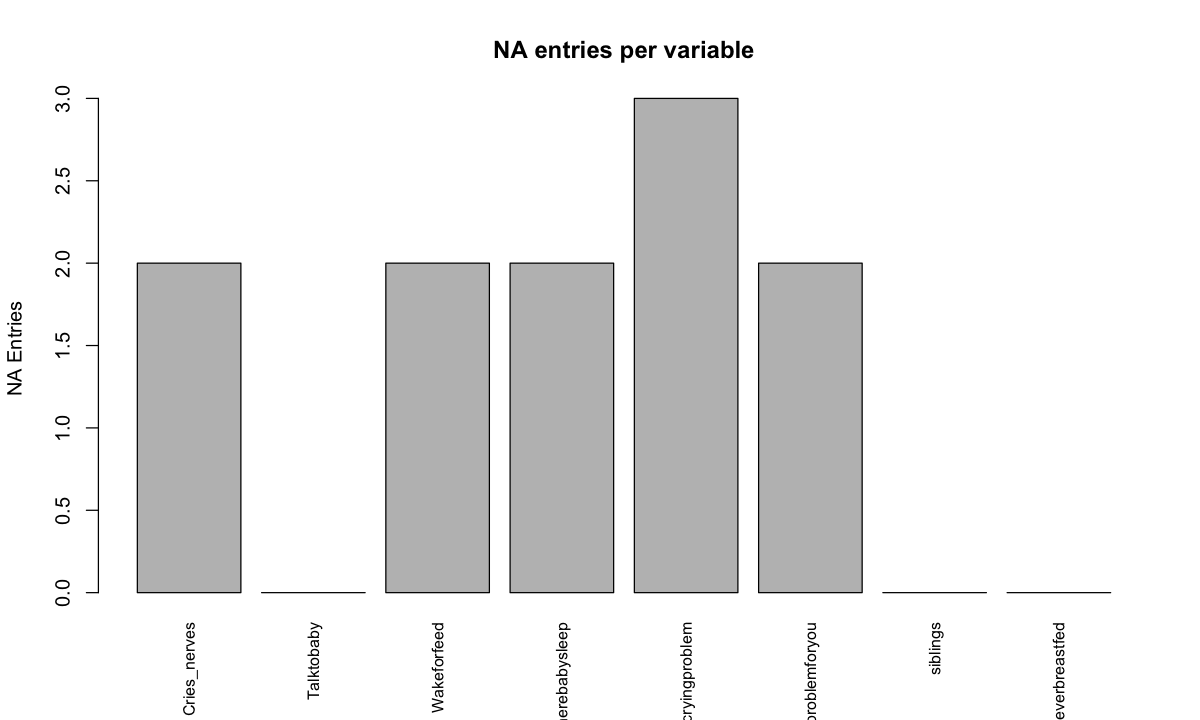

In [4]:
# Initialize a vector to store NA counts for each variable
na_counts <- numeric(length(gui1))

# Loop through each column of the data frame
for (i in seq_along(gui1)) {
  na_counts[i] <- sum(is.na(gui1[[i]]))
}

options(repr.plot.width = 10, repr.plot.height = 6)

# Create a bar plot with NA counts for each variable
barplot(na_counts, names.arg = names(gui1), las = 3, cex.names = 0.8, ylab = "NA Entries", main = "NA entries per variable")


# Handling missing data

In [5]:
gui2 <- (na.omit(gui1))  # omitting any row containing an NA value

cat("Before and after deleting any row containing an NA: ", nrow(gui1), nrow(gui2), "\n")

Before and after deleting any row containing an NA:  11134 11131 


# Producing a graph with surveygraph

In [7]:
library("surveygraph")
library("igraph")

First let's take a small subset of the 6889 rows in `gui2` above.

In [8]:
gui3 <- head(gui2, 200)

e <- surveygraph::make_projection(data = gui3, layer = "agent", threshold_method = "lcc")

str(e)

'data.frame':	4461 obs. of  3 variables:
 $ u     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ v     : int  35 38 41 43 44 47 48 55 59 63 ...
 $ weight: num  0.9 0.82 0.87 0.85 0.75 0.9 0.9 0.81 0.9 0.75 ...


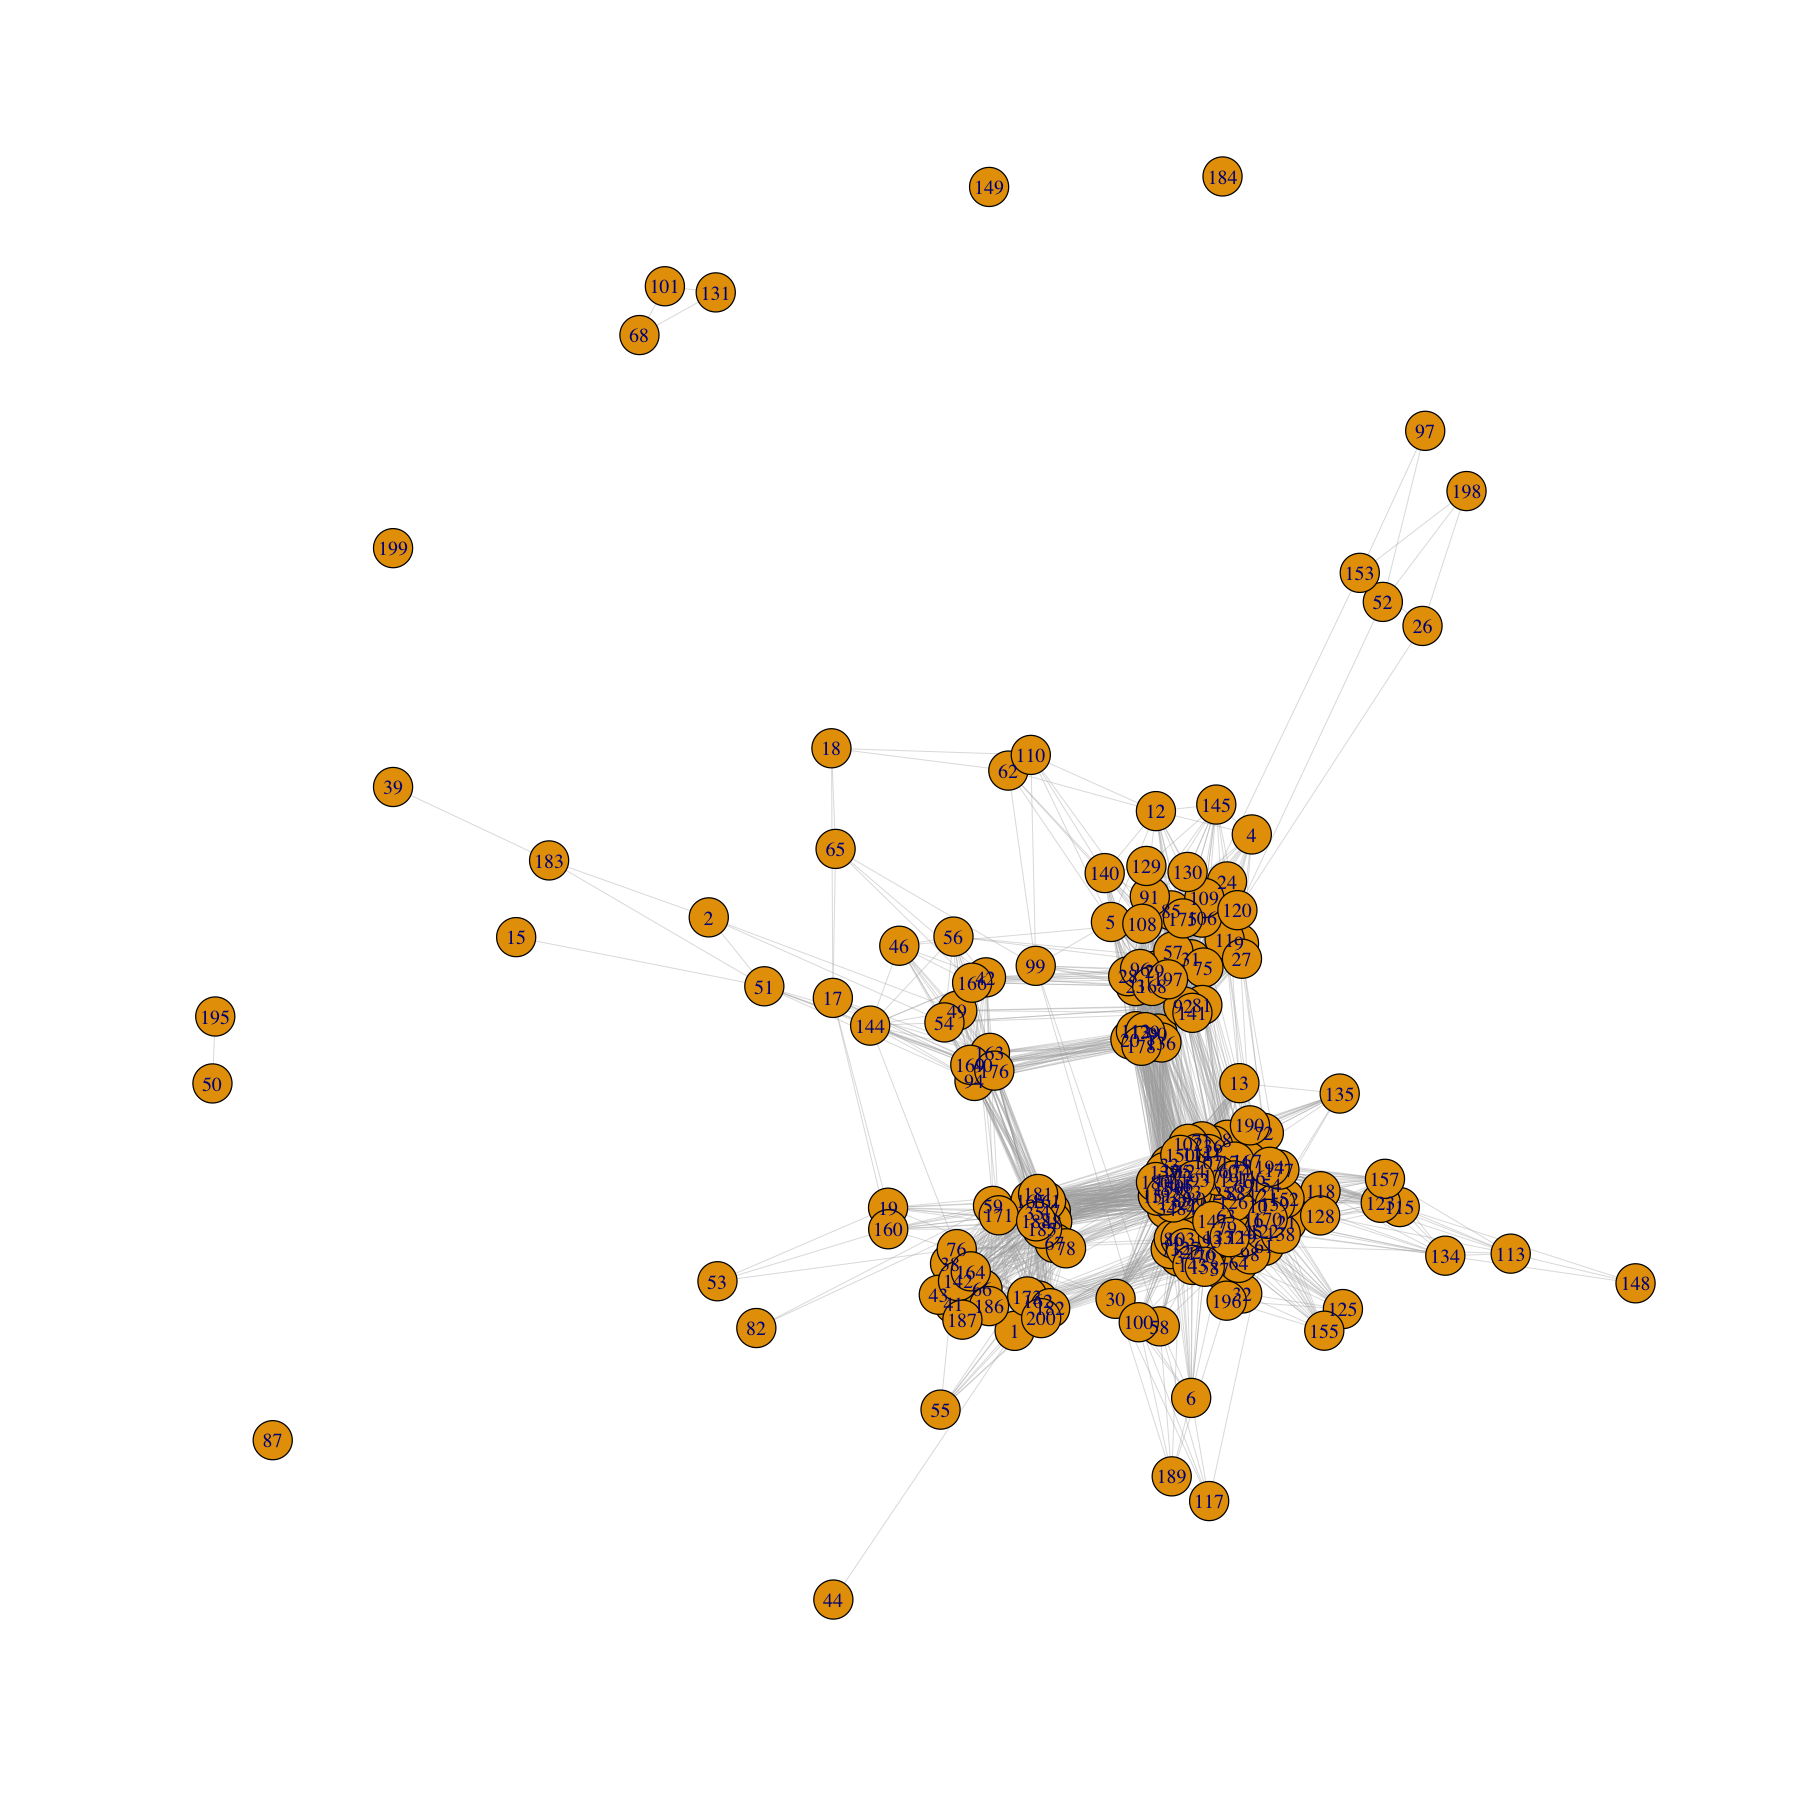

In [9]:
tmp <- row.names(gui3)

names <- data.frame(id=c(1:length(tmp)))

g <- graph_from_data_frame(e, vertices=names, directed=FALSE)

# g <- delete_vertices(g, which(degree(g)==0))
# g <- delete_vertices(g, c(199,538))

options(repr.plot.width = 15, repr.plot.height = 15)

plot(g, vertex.size=5.5, vertex.name=NA, edge.width=0.3, layout=layout.fruchterman.reingold)

Warning message in cluster_edge_betweenness(g, weights = NULL, directed = FALSE, :
“At vendor/cigraph/src/community/edge_betweenness.c:498 : Membership vector will be selected based on the highest modularity score.”


IGRAPH clustering edge betweenness, groups: 31, mod: 0.34
+ groups:
  $`1`
   [1] "1"   "19"  "35"  "38"  "41"  "43"  "47"  "48"  "59"  "66"  "67"  "76" 
  [13] "78"  "142" "160" "161" "162" "164" "165" "171" "173" "181" "182" "185"
  [25] "186" "187" "188" "200"
  
  $`2`
  [1] "2"
  
  $`3`
   [1] "3"   "6"   "8"   "10"  "13"  "14"  "16"  "21"  "22"  "25"  "30"  "32" 
  + ... omitted several groups/vertices

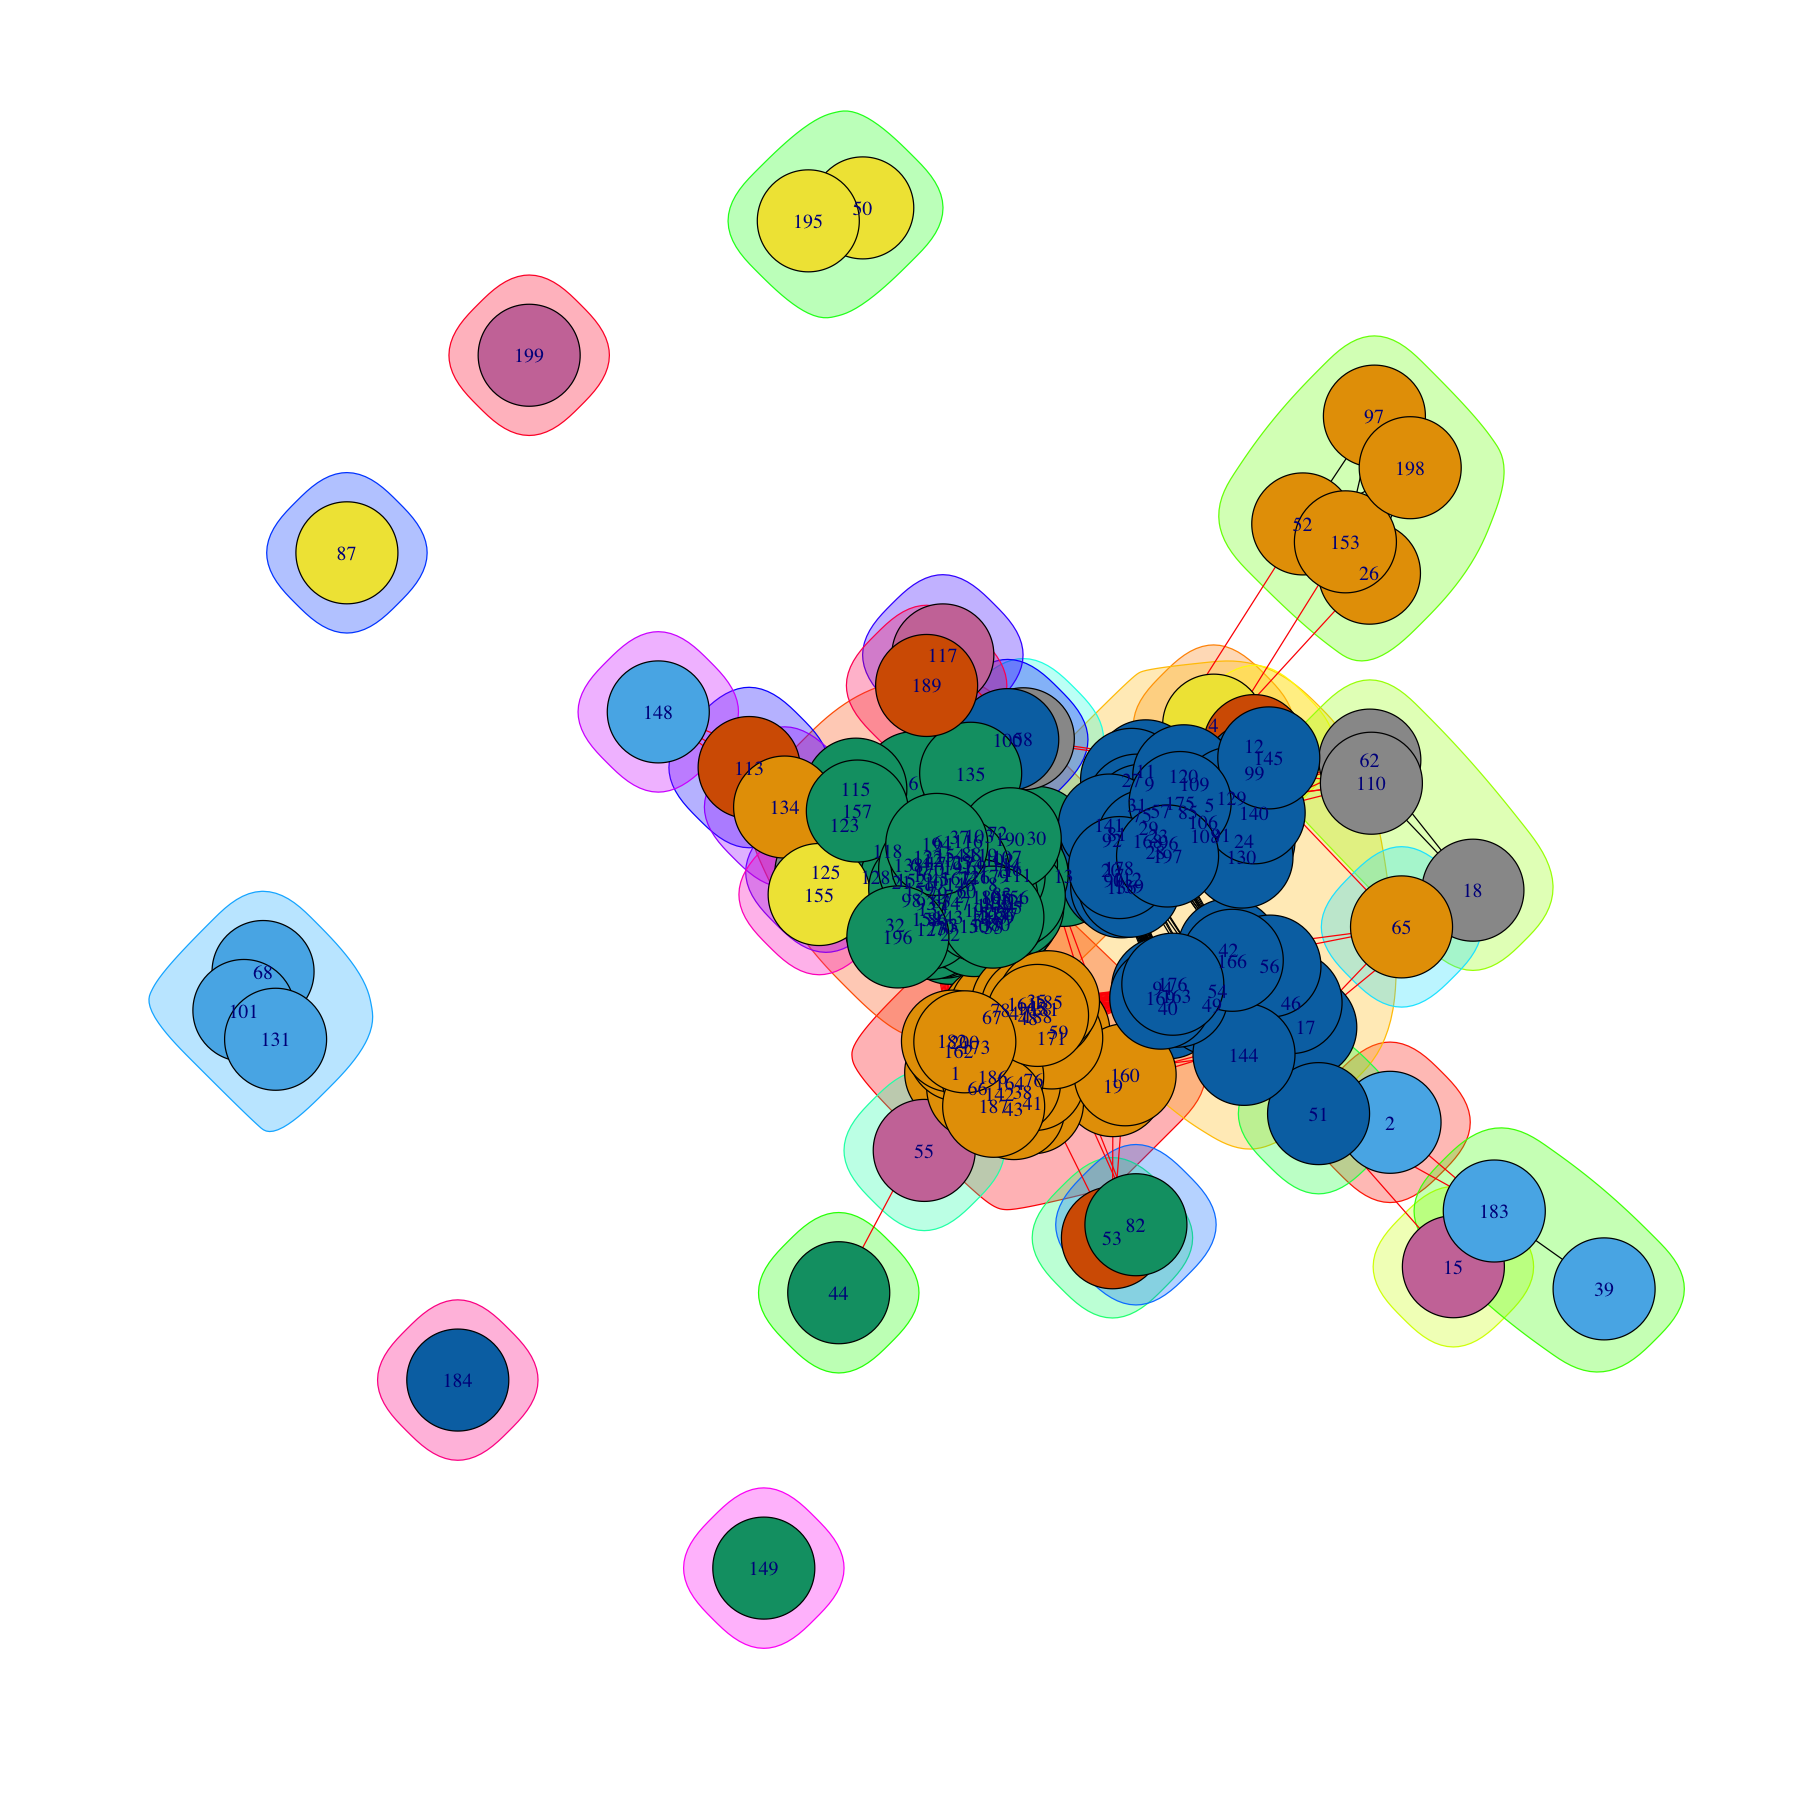

In [10]:
communities <- cluster_edge_betweenness(
  g,
  weights = NULL,
  directed = FALSE,
  edge.betweenness = TRUE,          #whether to return the edge betweenness of removed edges
  bridges = TRUE,                   #whether to return a list the edge removals
  modularity = TRUE,                #whether to calculate the maximum modularity score
  membership = TRUE                 #whether to return the membership of most modular solution
)

communities

plot(communities, g)

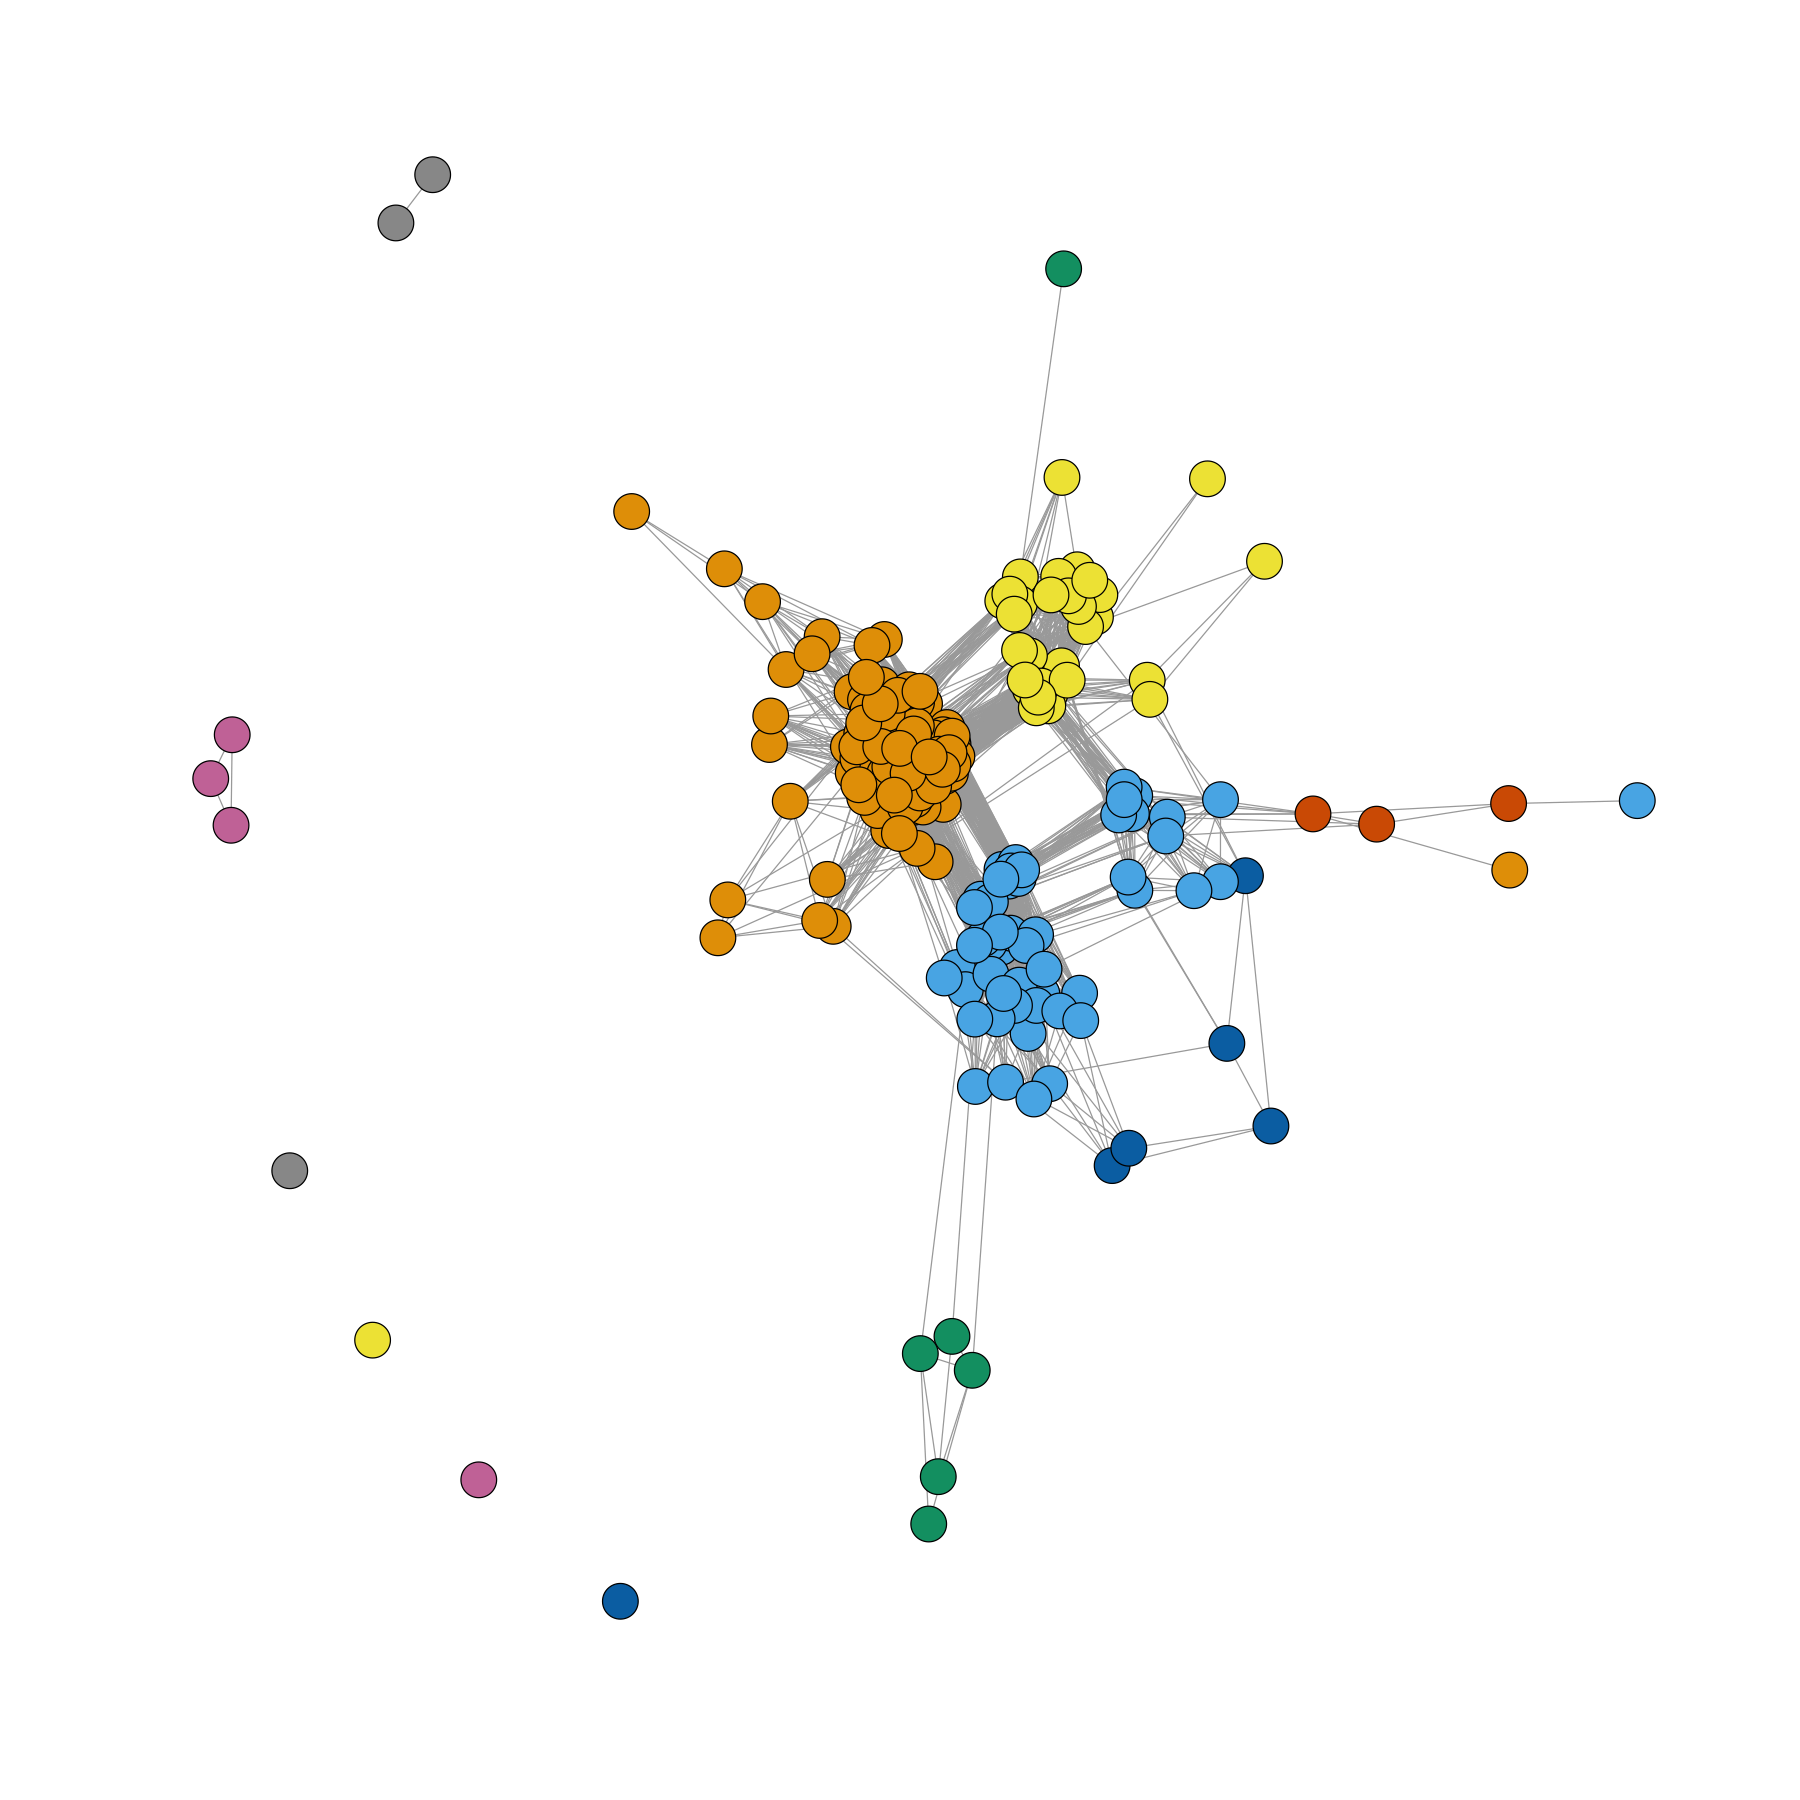

In [11]:
#Run the Walktrap algorithm
walktrap <- cluster_walktrap(g,steps=2)
#Note that we are using the set a short random walk length to be consistent with our theoretical framework

#Extract the communities from the community detection result and assign them to the node colour attribute in the graph
V(g)$color <- membership(walktrap)

#plot it
plot(g, vertex.size = 5, vertex.label = NA)

# walktrap[2]